In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt 

In [5]:
%matplotlib inline 

In [6]:
# Data Visualization Setup 
sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [7]:
# Read AppleStore CSV 
applestore_csv = 'downloads/AppleStore.csv'
appstore_df = pd.read_csv(applestore_csv)

In [8]:
# Display Apple Store Dataframe 
appstore_df 

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,0
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,0
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,0
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,0
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,0


In [9]:
# Questions about the dataset 
# 1. What are the most popular free (top 20) apps in the App Store?
# 2. What are the most popular genres? 
# 3. What are the most popular paid apps in the App Store? 
# 4. What is the average price arcoss all apps?
# 5. Do free apps have a higher rating compared to paid apps?
# 6. What's the average byte size of mobile apps?
# 7. How many apps are free vs. paid?
# 8. How many mobile apps are games and what is the general categorical distribution of apps by genre?
# 9. What are the most popular mobile games by total popular rating?

In [69]:
# Panda Commands 
#appstore_df.iloc[0]

# appstore_df.head()
# appstore_df.tail()
# appstore_df.describe()
# appstore_df.price.mean() 
# appstore_df.describe(include="0") --> Doesn't work 

1.1192423423422901

In [28]:
# Dropping the CURRENCY column
# appstore_df = appstore_df.drop("currency", axis="columns")
# appstore_df

In [67]:
appstore_df.loc[0]

id                        281656475
track_name          PAC-MAN Premium
price                          3.99
rating_count_tot              21292
rating_count_ver                 26
user_rating                       4
user_rating_ver                 4.5
ver                           6.3.5
cont_rating                      4+
prime_genre                   Games
sup_devices.num                  38
ipadSc_urls.num                   5
lang.num                         10
vpp_lic                           1
game_enab                         0
size_Mb                      100.79
price_categories               PAID
Name: 0, dtype: object

In [70]:
# Reformatting Size Bytes Column 
def _byte_resizer(data):
    return np.around(data / 1000000, decimals=2)
 
# Replacing "size_bytes" with "size_Mb"
# appstore_df["size_Mb"] = appstore_df["size_bytes"].apply(_byte_resizer)
#appstore_df["size_Mb"] = appstore_df["size_bytes"].apply(lambda num: np.around(num / 1000000, decimals=2))
appstore_df.drop("size_bytes", axis="columns", inplace=True)

KeyError: "labels ['size_byte'] not contained in axis"

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115a63828>)

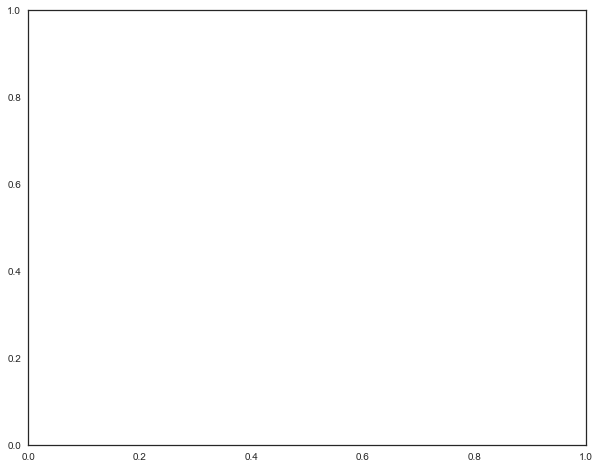

In [39]:
# Basic Visualizations 
plt.subplots(figsize=(10,8))

In [40]:
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]

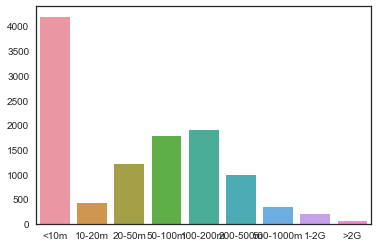

In [41]:
# Display Data 
freqs = pd.cut(appstore_df["size_Mb"], BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

In [42]:
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

In [43]:
# How does the cut method work?
appstore_df["price_categories"] = pd.cut(appstore_df["price"], BINS, include_lowest=True, labels=LABELS)

In [44]:
appstore_df

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,size_Mb,price_categories
0,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0,100.79,PAID
1,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0,158.58,FREE
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0,100.52,FREE
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0,128.51,FREE
4,282935706,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0,92.77,FREE
5,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,0,10.49,PAID
6,283646709,PayPal - Send and request money safely,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,0,227.80,FREE
7,284035177,Pandora - Music & Radio,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,0,130.24,FREE
8,284666222,PCalc - The Best Calculator,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,0,49.25,PAID
9,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,0,70.02,PAID


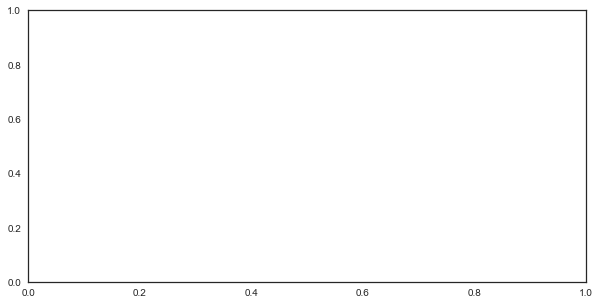

In [45]:
fig, axs = plt.subplots(figsize=(10, 5))

In [46]:
price_df = appstore_df["price_categories"].value_counts()

In [47]:
price_df

FREE    7959
PAID    3141
Name: price_categories, dtype: int64

(-1.1172128515167876,
 1.1008196595960376,
 -1.11044528544266,
 1.1165638157433673)

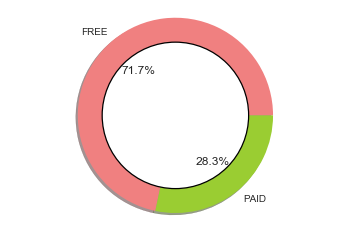

In [48]:
plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

In [49]:
free_apps = appstore_df.loc[appstore_df["price_categories"] == "FREE"]
paid_apps = appstore_df.loc[appstore_df["price_categories"] == "PAID"]

In [56]:
# Slicing categorical price data by sorting by total user ratings 
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

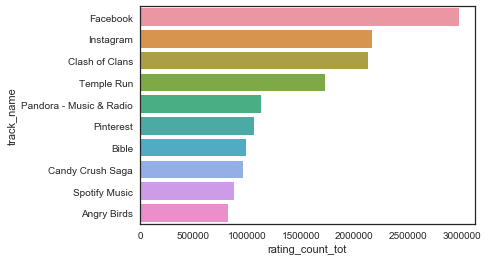

In [57]:
# visualize the top ten highest rated apps in each category

# Free Apps 
sns.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

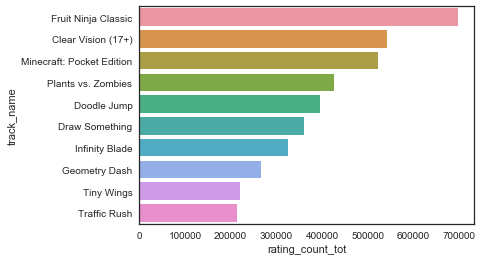

In [58]:
# PAID Apps 
sns.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])

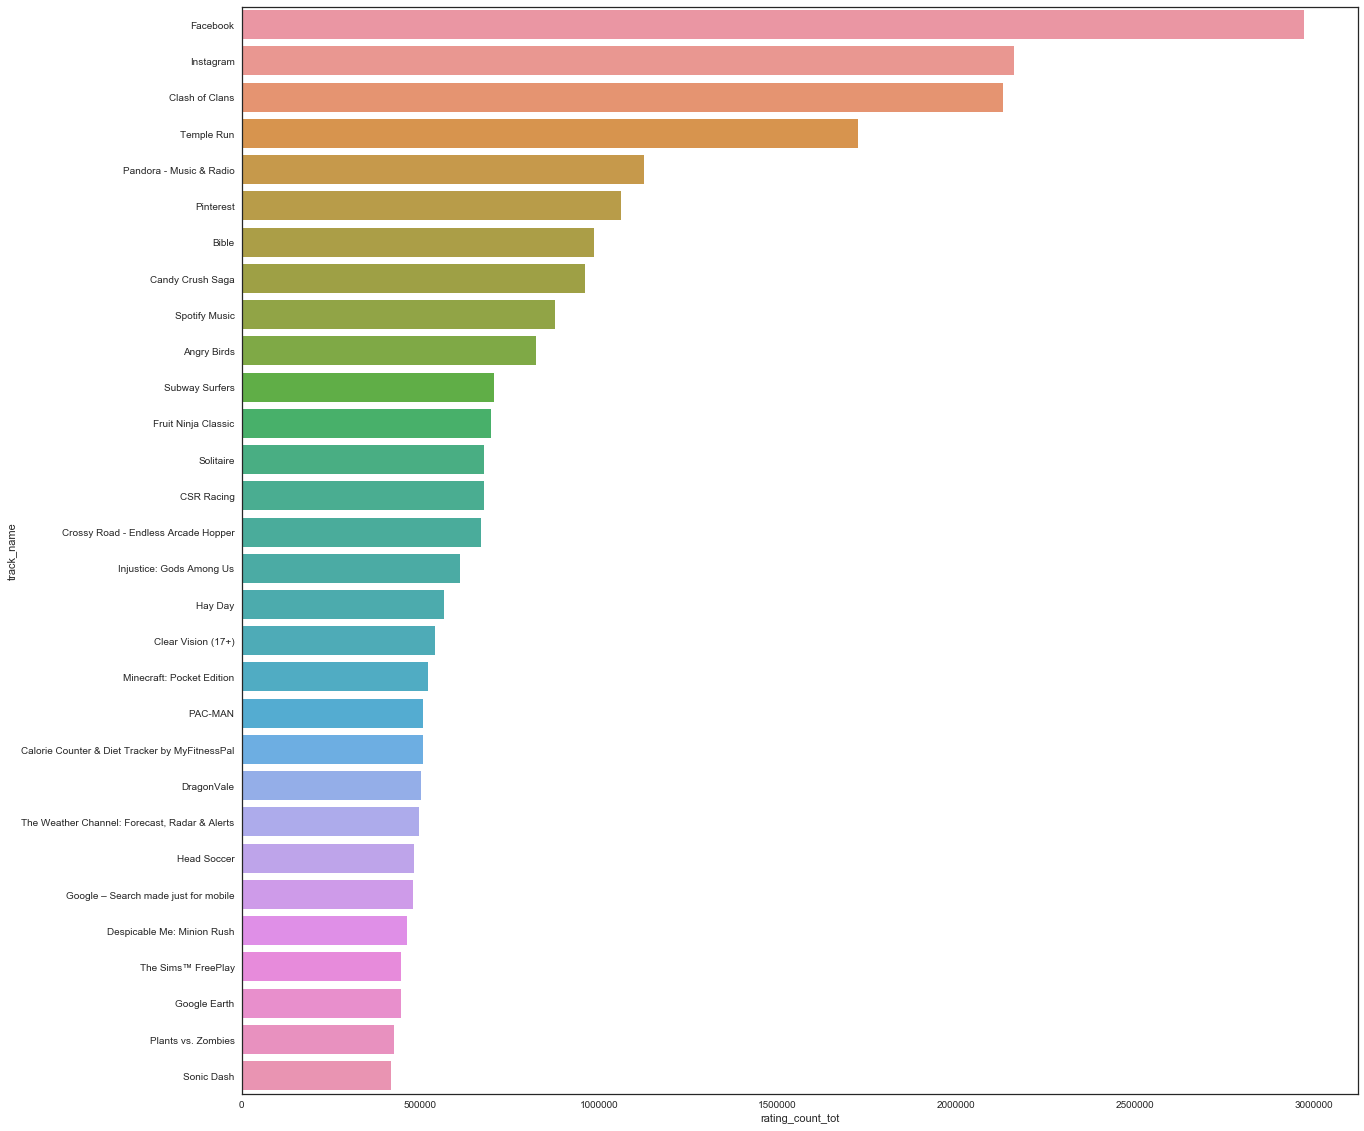

In [61]:
#  the highest rated apps of all time, regardless of price
plt.subplots(figsize=(20, 20))
ratings = appstore_df.sort_values(by=["rating_count_tot"], ascending=False)
sns.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])

In [ ]:
# Probablitity 